## About the Dataset

ACME Insurance Inc. offers affordable health insurance to thousands of customers across the United States. The company has tasked you with creating an automated system to estimate the annual medical expenditures for new customers. This system will utilize information such as age, sex, BMI, number of children, smoking habits, and region of residence to make accurate predictions.

These predictions will be used to determine the annual insurance premiums (the amount paid monthly) offered to the customers. Initially, a linear regression model was applied to the data, which provided insightful results for this estimation process.

**age:** Age of the customer

**sex:** Gender

**bmi:** Body Mass Index, an important health factor

**children:** number of children

**smoker:** whether the customer smokes or not

**region:** which region of the country the customer belongs to

**charges:** Target variable, the expenditure for the customer

# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

from sklearn.model_selection import train_test_split, KFold, cross_val_score

# Uploading Dataset

In [2]:
data=pd.read_csv("/kaggle/input/medical-insurance-payout/expenses.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


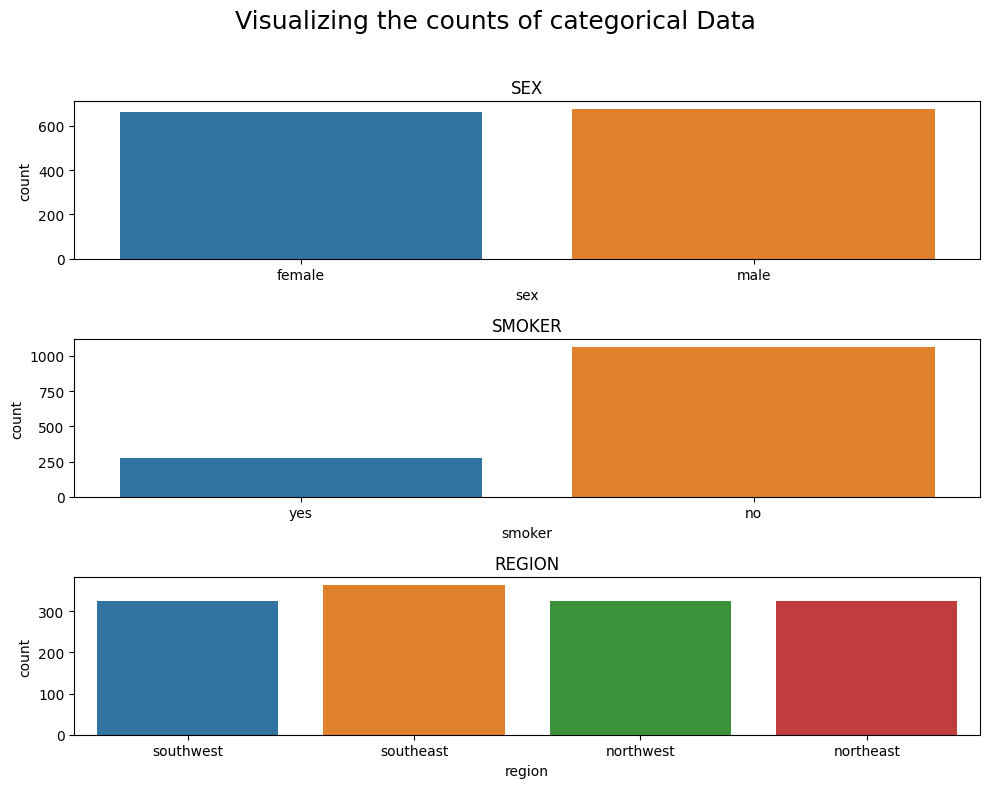

In [5]:
categorical = data.select_dtypes("object").columns.tolist()

plt.figure(figsize=(10, 8))
plt.suptitle("Visualizing the counts of categorical Data", fontsize=18)

for i, col in enumerate(categorical):
    plt.subplot(len(categorical), 1, i + 1)  # Alt grafikleri dinamik olarak ayarla
    sns.countplot(x=data[col])
    plt.title(col.upper())

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Başlığı ve alt grafikleri hizala
plt.show()

# One-hot-encoding and Standart Scaler

In [6]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
numeric_columns = data.select_dtypes(include=[int, float]).columns.tolist()


encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(data[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))


scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(data[numeric_columns])
numeric_df = pd.DataFrame(numeric_scaled, columns=numeric_columns)


final_df = pd.concat([numeric_df, one_hot_df], axis=1)


final_df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0.298584,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-1.509965,0.509621,-0.078767,-0.953689,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.797954,0.383307,1.580926,-0.728675,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.441948,-1.305531,-0.908614,0.719843,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.513149,-0.292556,-0.908614,-0.776802,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,-0.220551,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,-1.509965,0.206139,-0.908614,-0.914002,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,-1.509965,1.014878,-0.908614,-0.961596,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,-1.296362,-0.797813,-0.908614,-0.930362,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# Correlation

In [7]:
final_df.corr()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.020856,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.046371,-0.003750,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.017163,-0.007673,0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.057292,-0.787251,0.787251,0.006349,-0.039905,0.073982,-0.043210
sex_female,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184
sex_male,-0.020856,0.046371,0.017163,0.057292,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184
smoker_no,0.025019,-0.003750,-0.007673,-0.787251,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945
smoker_yes,-0.025019,0.003750,0.007673,0.787251,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945
region_northeast,0.002475,-0.138156,-0.022808,0.006349,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829


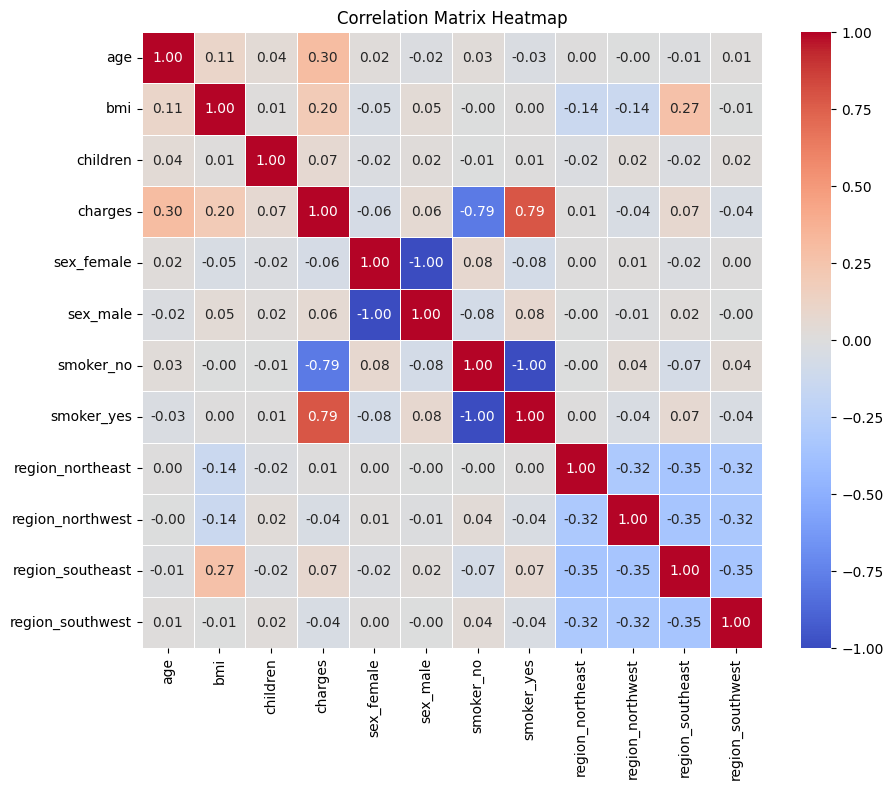

In [8]:
corr_matrix=final_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Target Features

In [9]:
x=final_df.drop('charges',axis = 1)
y=final_df["charges"]

In [10]:
final_df.shape

(1338, 12)

# Train-Test-Split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.01,random_state=50)

In [12]:
lr=LinearRegression()


## Kfold

In [13]:
kf = KFold(n_splits=10, shuffle=True, random_state=50)
r2_scores = cross_val_score(lr, x, y, cv=kf, scoring='r2')

# Output the R^2 scores for each fold and the mean score
print("R^2 scores for each fold:", r2_scores)
print("Mean R^2 score:", np.mean(r2_scores))

R^2 scores for each fold: [0.8045348  0.76417495 0.79385722 0.72733035 0.76594528 0.75816736
 0.68565136 0.72500548 0.69060893 0.71268903]
Mean R^2 score: 0.7427964768082904


In [14]:
lr.fit(X_train,y_train)

LinearRegression()

In [15]:
y_head=lr.predict(X_test)

In [16]:
r2=r2_score(y_test,y_head)

In [17]:
print("r2 skorum: ",r2)

r2 skorum:  0.8553069801489734


In [18]:
lr.score(X_test, y_test)

0.8553069801489734

In [19]:
x

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-1.509965,0.509621,-0.078767,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.797954,0.383307,1.580926,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.441948,-1.305531,-0.908614,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.513149,-0.292556,-0.908614,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,-1.509965,0.206139,-0.908614,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,-1.509965,1.014878,-0.908614,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,-1.296362,-0.797813,-0.908614,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# Polynomial Features

In [20]:
from sklearn.preprocessing import PolynomialFeatures

# PolynomialFeatures nesnesi oluşturma
degree = 3 # İstediğiniz derecede polinomal özellikler ekleyebilirsiniz
poly = PolynomialFeatures(degree)

# Var olan scale edilmiş veriyi polinomal özelliklere dönüştürme
X_poly = poly.fit_transform(final_df)

# Train-test split (aynı veri bölme işlemi uygulanır)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.20, random_state=50)

# Lineer regresyon modelini tanımlama ve eğitme
lr_poly = LinearRegression()
kf_poly = KFold(n_splits=10, shuffle=True, random_state=50)

# K-fold cross-validation ile R^2 skorlarını hesaplama
r2_scores_poly = cross_val_score(lr_poly, X_poly, y, cv=kf_poly, scoring='r2')

# Her bir katlama için ve ortalama R^2 skorlarını yazdırma
print("Her katlama için R^2 skorları (polinomal özellikler):", r2_scores_poly)
print("Ortalama R^2 skoru (polinomal özellikler):", np.mean(r2_scores_poly))

# Modeli eğitme
lr_poly.fit(X_train_poly, y_train)

# Test seti üzerinde tahmin yapma
y_head_poly = lr_poly.predict(X_test_poly)

# R^2 skorunu hesaplama
r2_poly = r2_score(y_test, y_head_poly)
print("Test seti üzerindeki R^2 skoru (polinomal özellikler):", r2_poly)


Her katlama için R^2 skorları (polinomal özellikler): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Ortalama R^2 skoru (polinomal özellikler): 1.0
Test seti üzerindeki R^2 skoru (polinomal özellikler): 1.0


# Can you like it if you checked my work?